# Notebook imports

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Read the CSV file
housing_data = pd.read_csv("HousingData.csv")

# View the first 5 rows
housing_data.head()
housing_data.describe()

#charts would show up even when we export our notebooks
%matplotlib inline

# Gather Data

## Data points and features

In [5]:
type(housing_data)

pandas.core.frame.DataFrame

In [6]:
housing_data.shape

(506, 14)

In [7]:
housing_data.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622    3  222     18.7   

        B  LSTAT  MEDV  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90    NaN  36.2

In [8]:
housing_data

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900    1  296   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671    2  242   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671    2  242   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622    3  222   
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622    3  222   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...  ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786    1  273   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875    1  273   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675    1  273   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889    1  273   
505  0.04741   0.0  11.93   0.0  0.573  6.030   NaN  2.5050    1  273   

     PTRATIO       B  LSTAT  MEDV  
0       15.3  396.90   4.98  24.0  
1       17.8  396.90   9.14  21.6  
2       17.8  392.83   4.03  34.7  
3       18.7  394.63   2.94  33.4  
4       18.7  396.90    NaN  36.2  
..       ...     ...    ...   ...  
501     21.0  391.99    NaN  22.4  
502     21.0  396.90   9.08  20.6  
503     21.0  396.90   5.64  23.9  
504     21.0  393.45   6.48  22.0  
505     21.0  396.90   7.88  11.9  

[506 rows x 14 columns]

## Cleaning Data

In [9]:
pd.isnull(housing_data).any()

CRIM        True
ZN          True
INDUS       True
CHAS        True
NOX        False
RM         False
AGE         True
DIS        False
RAD        False
TAX        False
PTRATIO    False
B          False
LSTAT       True
MEDV       False
dtype: bool

In [10]:
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


## Visualising Data - Histograms, Distributions and Bar Charts

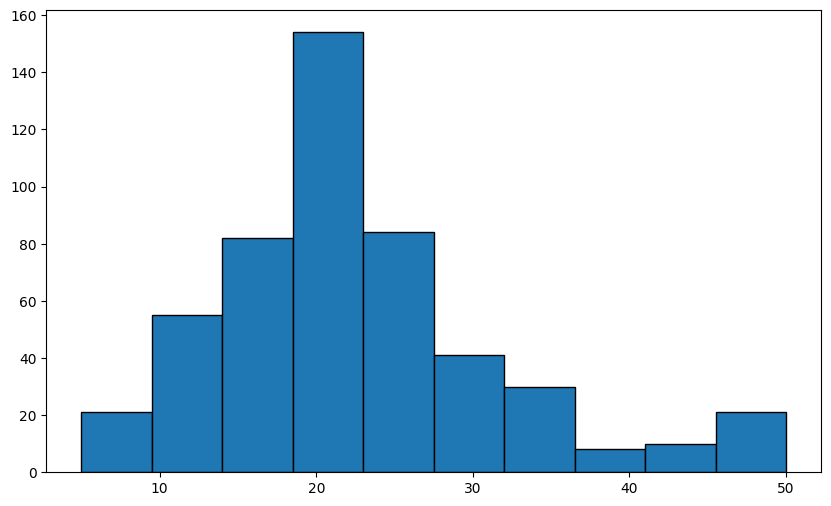

In [11]:
plt.figure(figsize = (10,6))
plt.hist(housing_data['MEDV'], ec='black')
plt.show()

## Correlation
## $$ \rho _{XY} = corr(X,Y)$$
## $$ -1.0 \leq \rho _{X,Y} \leq +1.0 $$

In [12]:
housing_data['MEDV'].corr(housing_data['RM'])
# price vs room size - correlation

0.6953599470715396

In [13]:
# Calculate the correlation between the property prices and the pupil teacher ratio
housing_data['MEDV'].corr(housing_data['PTRATIO'])
# since we have a negative correlation here, it means is that, the higher the cost of housing, lesser is the PT ratio
# which means high quality of education

-0.5077866855375618

In [14]:
# Correlating the whole data instead of doing one bye one
# Pearson Correlation Coeffecient
housing_data.corr()
# correlation of a variable against itself is always equal to one

CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
CRIM     1.000000 -0.191178  0.401863 -0.054355  0.417130 -0.219150  0.354342   
ZN      -0.191178  1.000000 -0.531871 -0.037229 -0.513704  0.320800 -0.563801   
INDUS    0.401863 -0.531871  1.000000  0.059859  0.764866 -0.390234  0.638431   
CHAS    -0.054355 -0.037229  0.059859  1.000000  0.075097  0.104885  0.078831   
NOX      0.417130 -0.513704  0.764866  0.075097  1.000000 -0.302188  0.731548   
RM      -0.219150  0.320800 -0.390234  0.104885 -0.302188  1.000000 -0.247337   
AGE      0.354342 -0.563801  0.638431  0.078831  0.731548 -0.247337  1.000000   
DIS     -0.374166  0.656739 -0.711709 -0.093971 -0.769230  0.205246 -0.744844   
RAD      0.624765 -0.310919  0.604533  0.001468  0.611441 -0.209847  0.458349   
TAX      0.580595 -0.312371  0.731055 -0.032304  0.668023 -0.292048  0.509114   
PTRATIO  0.281110 -0.414046  0.390954 -0.111304  0.188933 -0.355501  0.269226   
B       -0.381411  0.171303 -0.360532  0.051264 -0.380051  0.128069 -0.275303   
LSTAT    0.444943 -0.414193  0.590690 -0.047424  0.582641 -0.614339  0.602891   
MEDV    -0.391363  0.373136 -0.481772  0.181391 -0.427321  0.695360 -0.394656   

              DIS       RAD       TAX   PTRATIO         B     LSTAT      MEDV  
CRIM    -0.374166  0.624765  0.580595  0.281110 -0.381411  0.444943 -0.391363  
ZN       0.656739 -0.310919 -0.312371 -0.414046  0.171303 -0.414193  0.373136  
INDUS   -0.711709  0.604533  0.731055  0.390954 -0.360532  0.590690 -0.481772  
CHAS    -0.093971  0.001468 -0.032304 -0.111304  0.051264 -0.047424  0.181391  
NOX     -0.769230  0.611441  0.668023  0.188933 -0.380051  0.582641 -0.427321  
RM       0.205246 -0.209847 -0.292048 -0.355501  0.128069 -0.614339  0.695360  
AGE     -0.744844  0.458349  0.509114  0.269226 -0.275303  0.602891 -0.394656  
DIS      1.000000 -0.494588 -0.534432 -0.232471  0.291512 -0.493328  0.249929  
RAD     -0.494588  1.000000  0.910228  0.464741 -0.444413  0.479541 -0.381626  
TAX     -0.534432  0.910228  1.000000  0.460853 -0.441808  0.536110 -0.468536  
PTRATIO -0.232471  0.464741  0.460853  1.000000 -0.177383  0.375966 -0.507787  
B        0.291512 -0.444413 -0.441808 -0.177383  1.000000 -0.369889  0.333461  
LSTAT   -0.493328  0.479541  0.536110  0.375966 -0.369889  1.000000 -0.735822  
MEDV     0.249929 -0.381626 -0.468536 -0.507787  0.333461 -0.735822  1.000000

In [15]:
mask = np.zeros_like(housing_data.corr())
triangle_indices = np.triu_indices_from(mask)
mask[triangle_indices] = True
# removing the duplicates

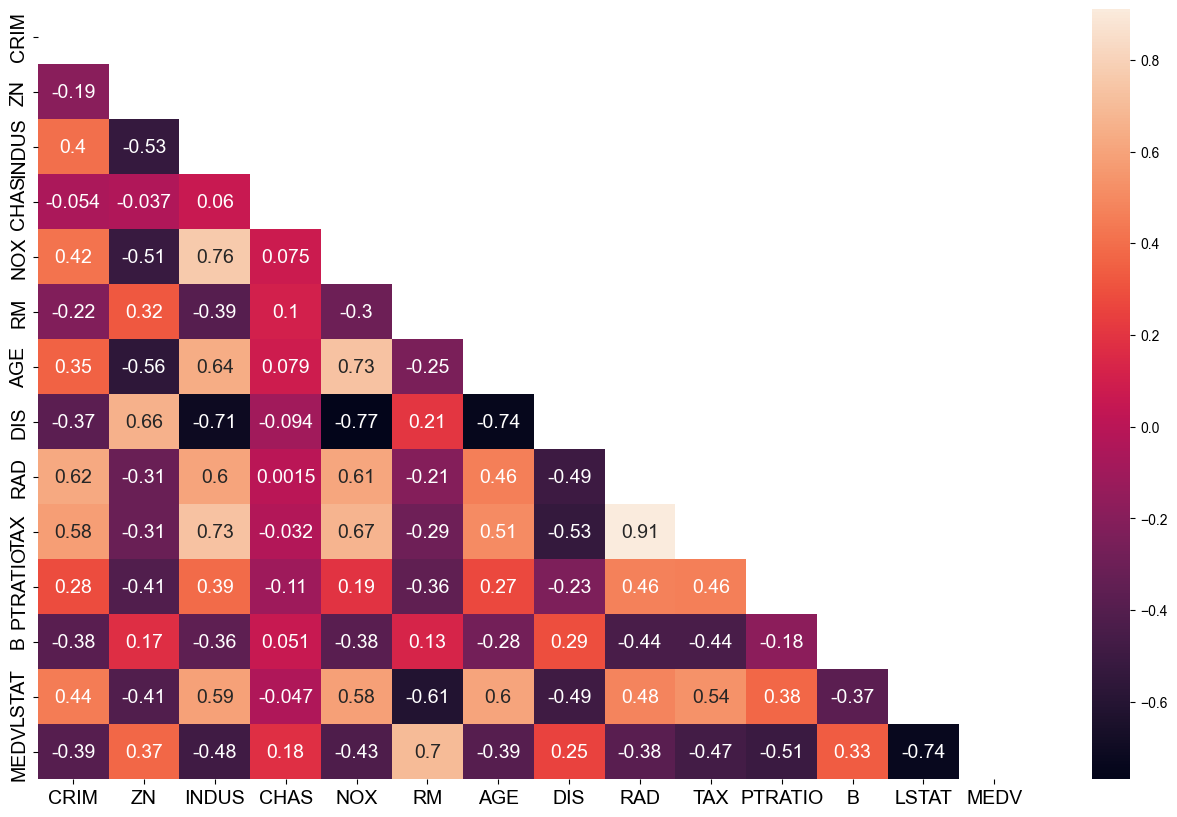

In [16]:
# Correlation Matrix
plt.figure(figsize = (16,10))
sns.heatmap(housing_data.corr(), mask = mask, annot = True, annot_kws={"size": 14})
sns.set_style('white')
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.show()

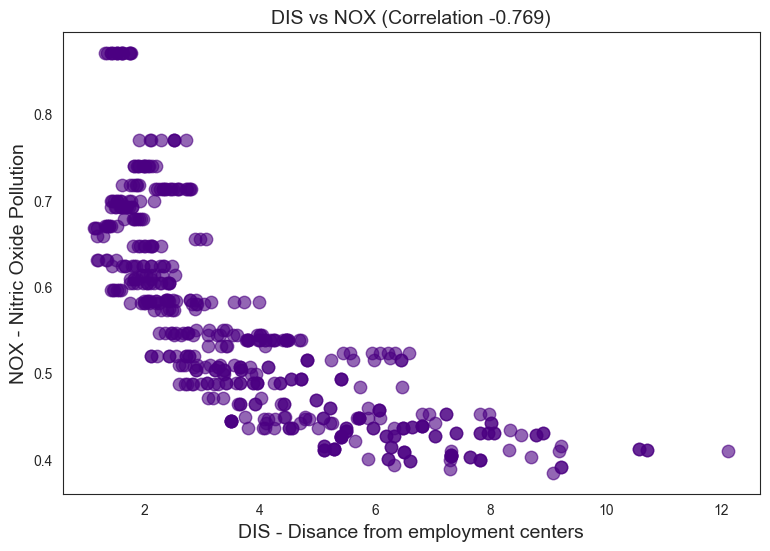

In [17]:
# Challenge: Picture the relationship between pollution and distance in your head
# Then create a scatter plot between DIS and NOX
nox_dis_corr = round(housing_data['NOX'].corr(housing_data['DIS']),3)
plt.figure(figsize = (9,6))
plt.title(f'DIS vs NOX (Correlation {nox_dis_corr})', fontsize = 14)
plt.scatter(housing_data['DIS'], housing_data['NOX'], alpha=0.6, s=80, color = 'indigo')
plt.xlabel('DIS - Disance from employment centers', fontsize = 14)
plt.ylabel('NOX - Nitric Oxide Pollution', fontsize = 14)
plt.show()

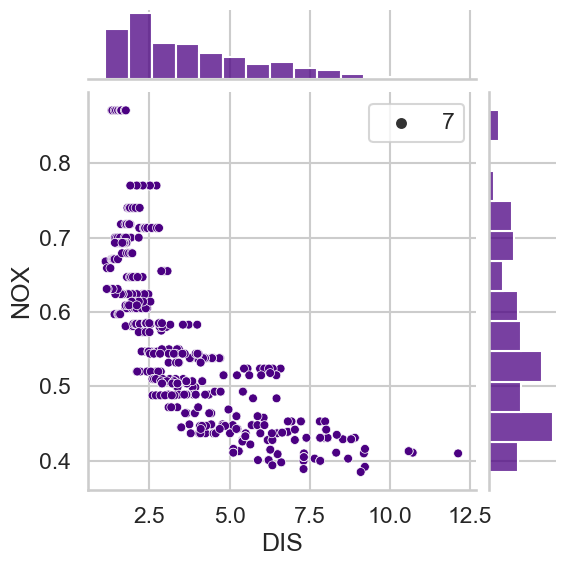

In [18]:
# Seaborn builds on top of matplotlib - like matplot on steriods
sns.set()
# set is used to reset the styling to default
sns.set_context('talk')
sns.set_style('whitegrid')
sns.jointplot(x=housing_data['DIS'], y=housing_data['NOX'], size=7, color='indigo')
plt.show()

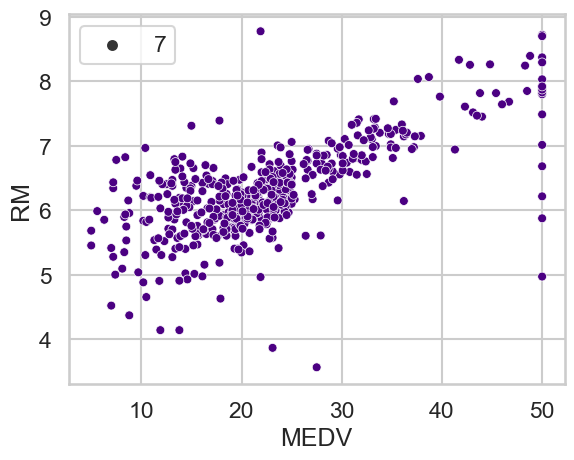

In [19]:
# Challenge: create a scatter plot between the house prices and the number of rooms (RM)
# Seaborn builds on top of matplotlib - like matplot on steriods
sns.set()
# set is used to reset the styling to default
sns.set_context('talk')
sns.set_style('whitegrid')
sns.scatterplot(x=housing_data['MEDV'], y=housing_data['RM'], size=7, color='indigo')
plt.show()

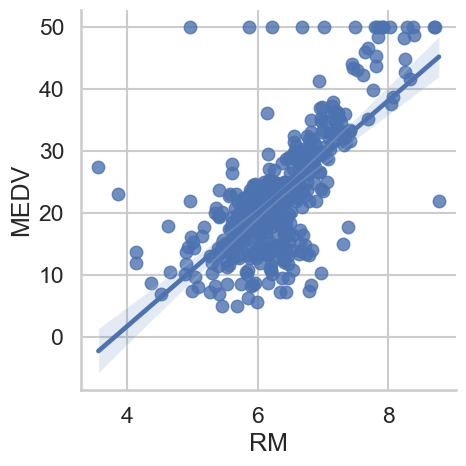

In [20]:
# Challenge: create a regression plot between the house prices and the number of rooms (RM)
# Seaborn builds on top of matplotlib - like matplot on steriods
# set is used to reset the styling to default
sns.lmplot(x='RM', y='MEDV', data = housing_data)
plt.show()

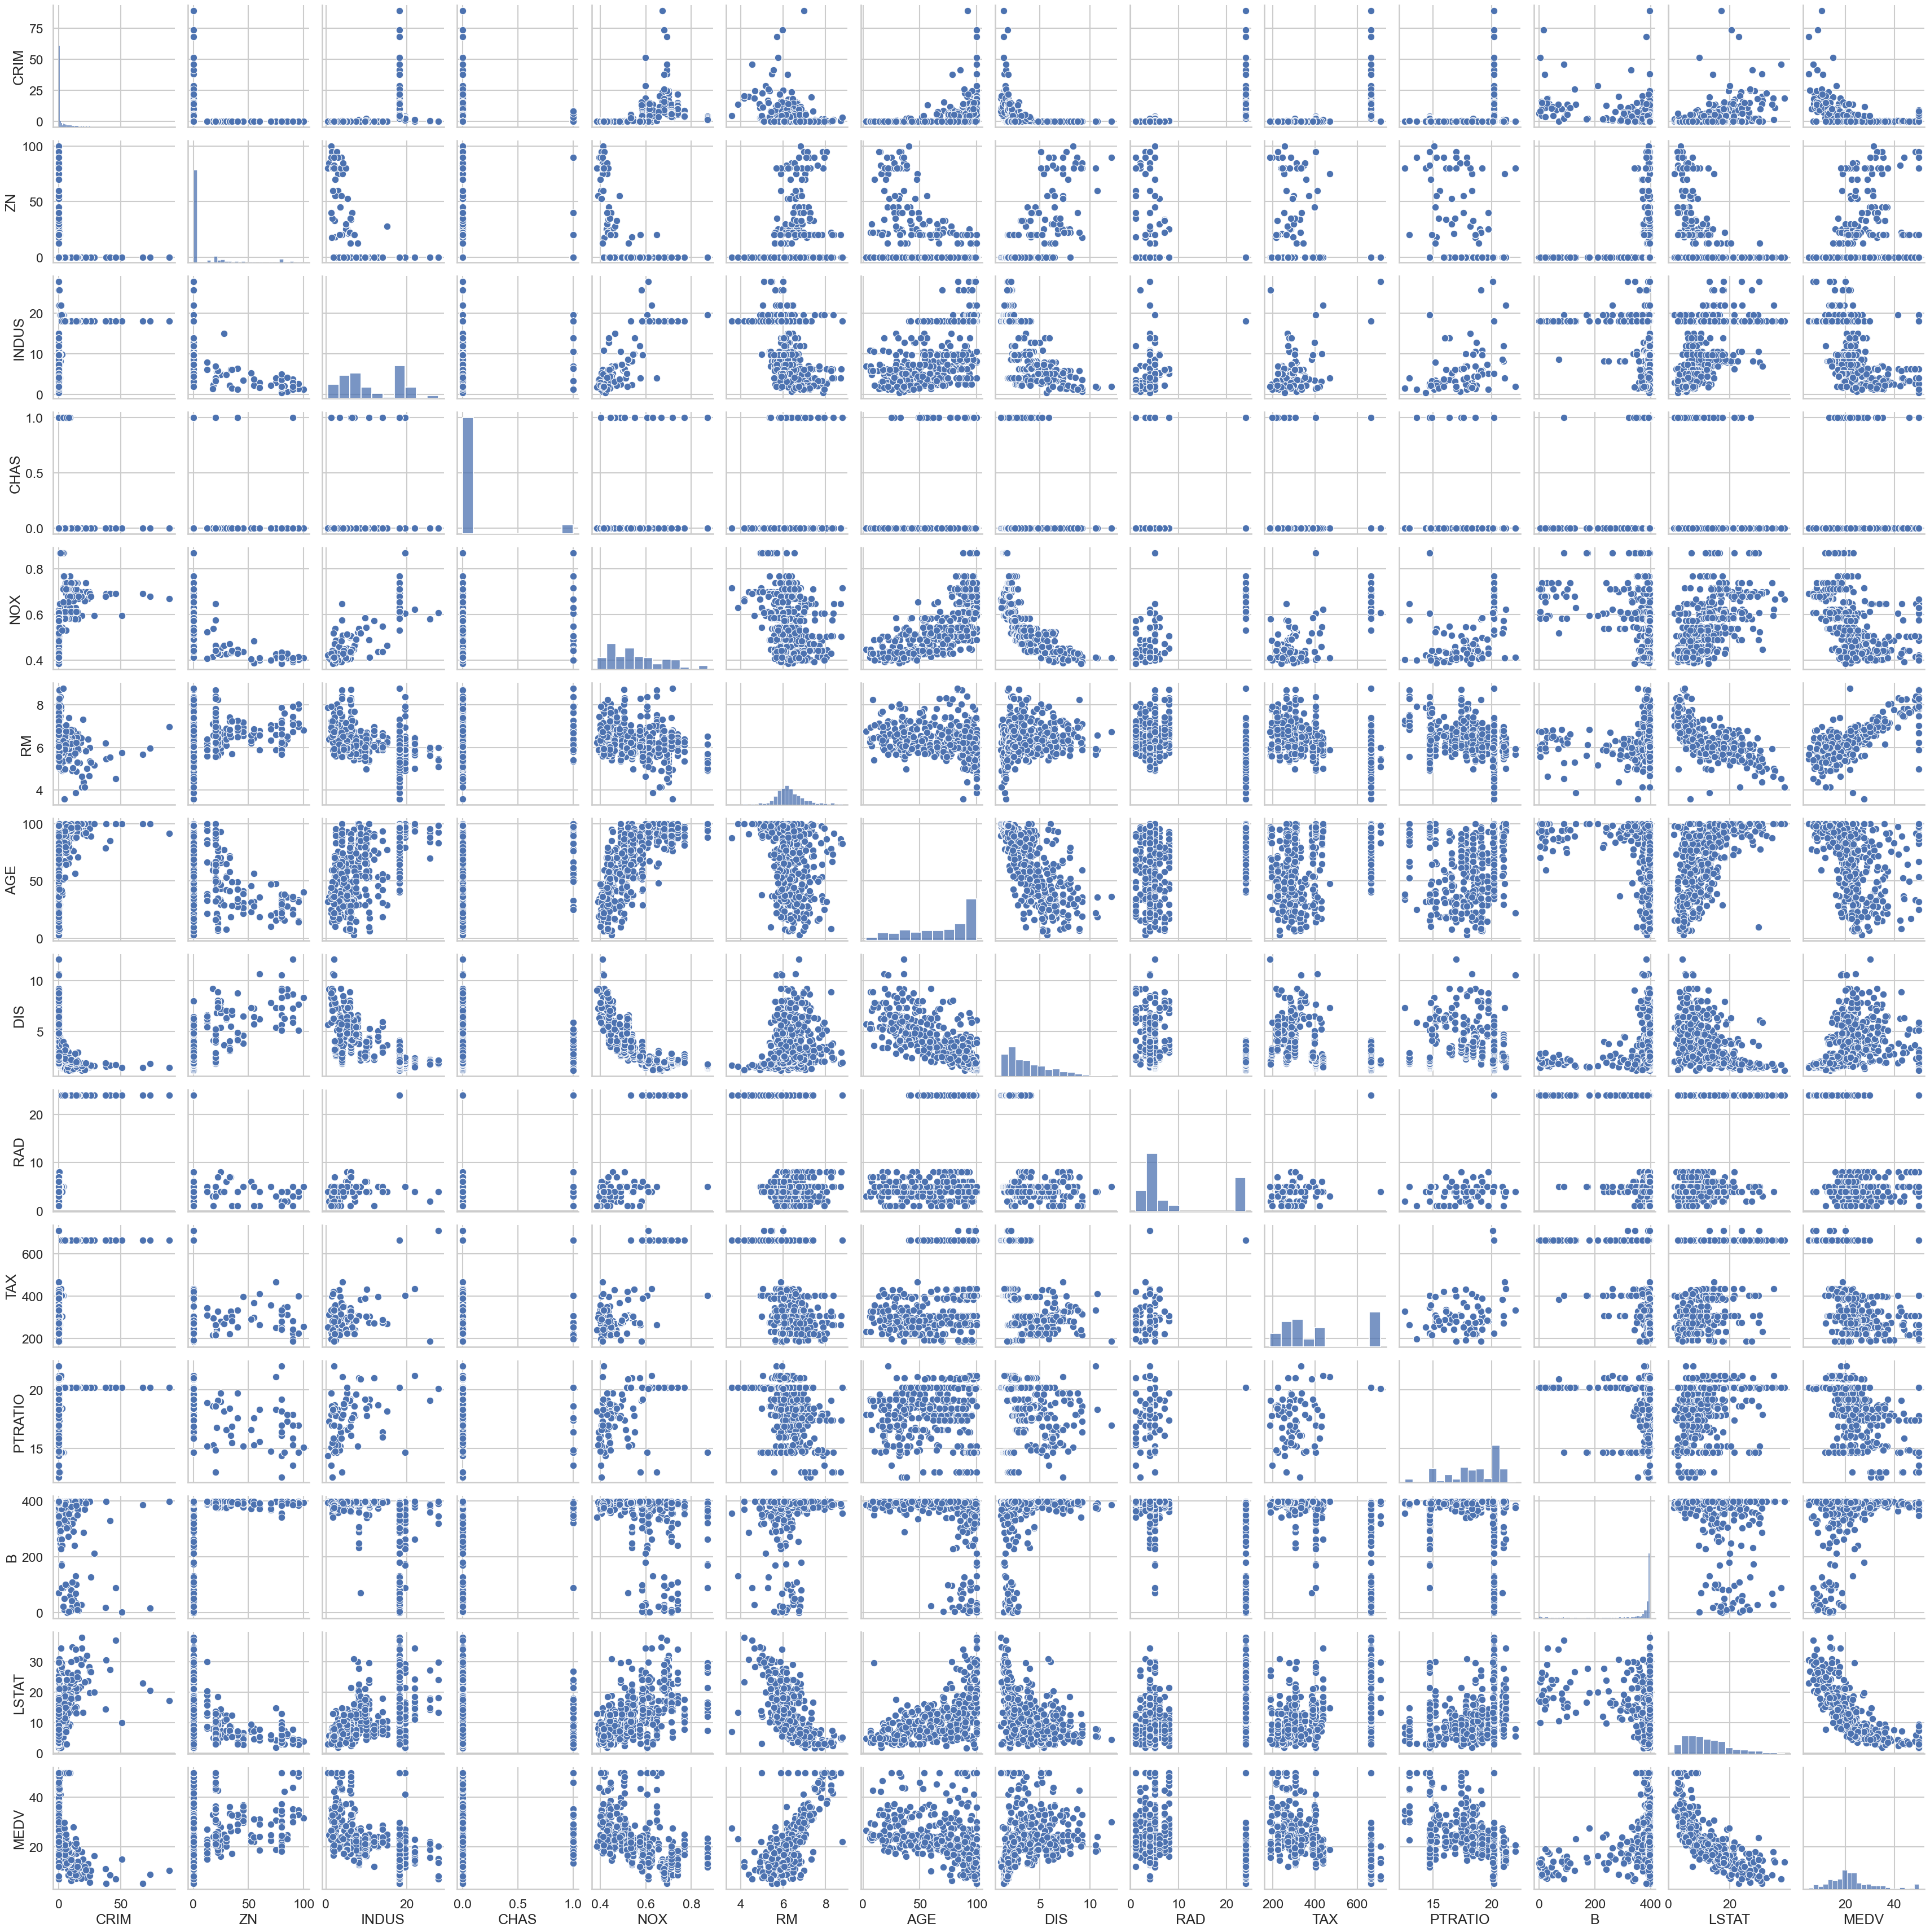

Wall time: 22.3 s


In [21]:
%%time
# Magic plot - showing all the combinations of scatter plots for each variables
sns.pairplot(housing_data)
plt.show()

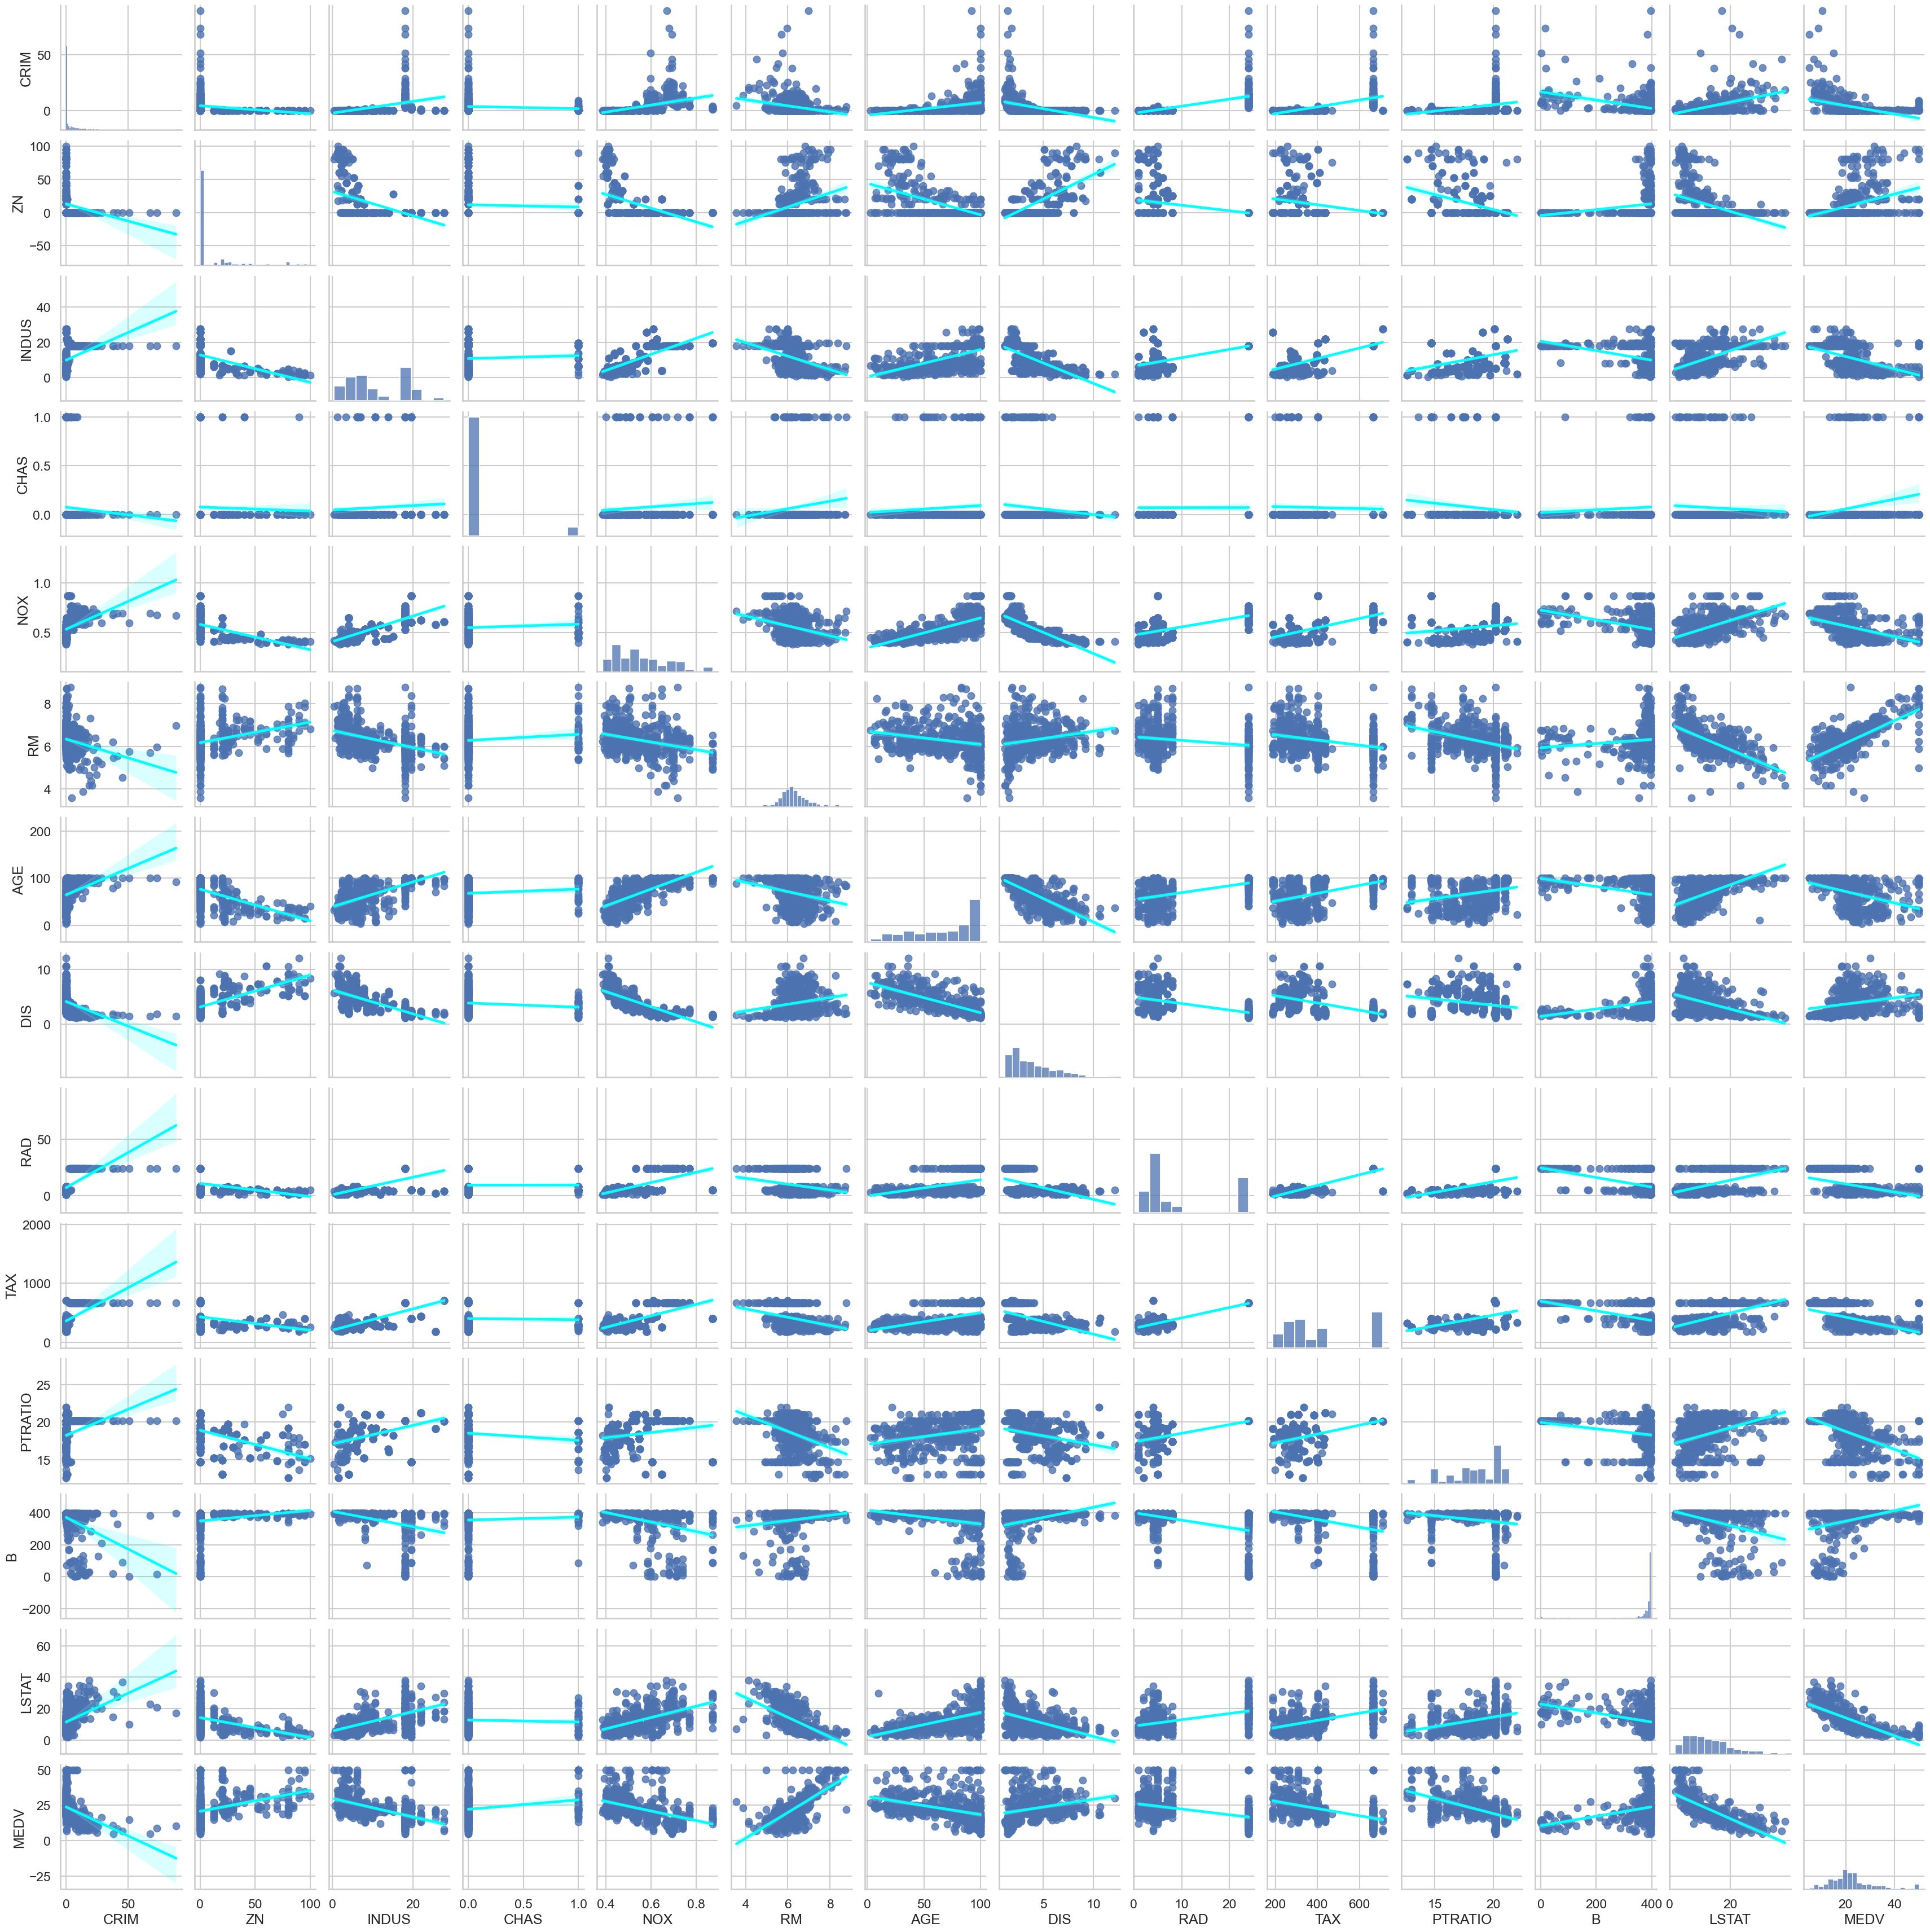

Wall time: 35.4 s


In [22]:
%%time
sns.pairplot(housing_data, kind = 'reg', plot_kws={'line_kws': {'color': 'cyan'}})
# scatter is default
plt.show()

# Training and Test Dataset Split

In [23]:
housing_data = housing_data[np.isfinite(housing_data).all(1)]
prices = housing_data['MEDV']
features = housing_data.drop('MEDV', axis=1)

X_train, X_test, y_train, y_test = train_test_split(features, prices, test_size = 0.2, random_state = 10 )
#test data set is 20% of total

# % of training set
len(X_train)/len(features)

len(X_test)/len(features)

0.20050761421319796

# Multivariable Regression

In [24]:
regr = LinearRegression()
regr.fit(X_train, y_train)
print('Intercept' , regr.intercept_)
pd.DataFrame(data=regr.coef_, index=X_train.columns, columns=['coef'])

#Challenge: print out r-squared for training and test datasets
print('Training data r-squared:', regr.score(X_train, y_train))
print('Test data r-squared:', regr.score(X_test, y_test))

Intercept 40.11283920903087
Training data r-squared: 0.7699648083793559
Test data r-squared: 0.7291192461876811


# Data Transformations

In [25]:
housing_data['MEDV'].skew()

1.0659462275359775

In [29]:
y_log = np.log(housing_data['MEDV'])
y_log.tail()
#after changing the data to log - the skew has changed from 1.06 to -0.41 which is much better
y_log.skew()

-0.41184069003934703

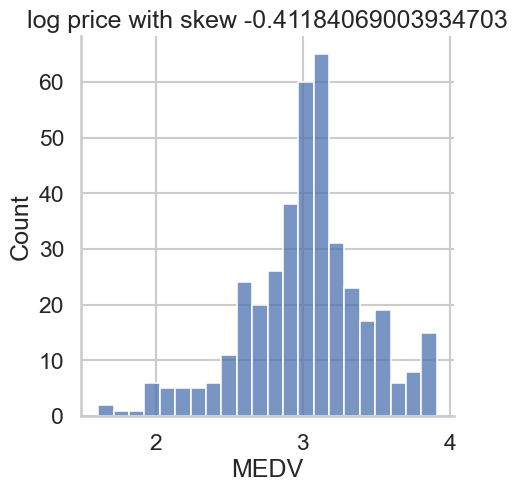

In [31]:
sns.displot(y_log)
plt.title(f'log price with skew {y_log.skew()}')
plt.show()

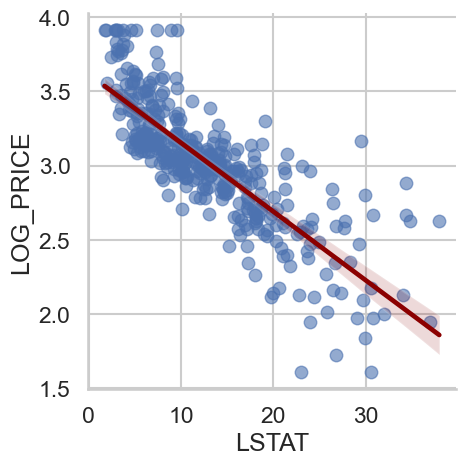

In [35]:
#plotting using transformed data
transformed_data = features
transformed_data['LOG_PRICE'] = y_log
sns.lmplot(x='LSTAT', y= 'LOG_PRICE', data = transformed_data, scatter_kws={'alpha': 0.6}, line_kws={'color': 'darkred'})
plt.show()

## Regression using log prices

In [38]:
housing_data = housing_data[np.isfinite(housing_data).all(1)]
prices = np.log(housing_data['MEDV'])
features = housing_data.drop('MEDV', axis=1)

X_train, X_test, y_train, y_test = train_test_split(features, prices, test_size = 0.2, random_state = 10 )
#test data set is 20% of total

regr = LinearRegression()
regr.fit(X_train, y_train)
print('Intercept' , regr.intercept_)
pd.DataFrame(data=regr.coef_, index=X_train.columns, columns=['coef'])

#Challenge: print out r-squared for training and test datasets
print('Training data r-squared:', regr.score(X_train, y_train))
print('Test data r-squared:', regr.score(X_test, y_test))
# reducing the skew in our distribution of our target
# as a result we have higher r squared and a better fit
pd.DataFrame(data=regr.coef_, index=X_train.columns, columns=['coef'])

Intercept 4.33255726734018
Training data r-squared: 0.8089197937111323
Test data r-squared: 0.7995109513092351


coef
CRIM    -0.009418
ZN       0.001487
INDUS    0.002950
CHAS     0.127465
NOX     -0.961364
RM       0.081681
AGE     -0.000007
DIS     -0.053680
RAD      0.014424
TAX     -0.000708
PTRATIO -0.037371
B        0.000314
LSTAT   -0.028944

In [37]:
# Charles River Premium
np.e**0.080475

1.0838017512597784

## P values and evaluating coeffecients

In [52]:
X_include_const = sm.add_constant(X_train)
model = sm.OLS(y_train, X_include_const)
# fitting our regression model
results = model.fit()
#results.params
#results.pvalues
pd.DataFrame({'coef': results.params, 'p-value': round(results.pvalues, 3)})

coef  p-value
const    4.332557    0.000
CRIM    -0.009418    0.000
ZN       0.001487    0.038
INDUS    0.002950    0.399
CHAS     0.127465    0.004
NOX     -0.961364    0.000
RM       0.081681    0.000
AGE     -0.000007    0.992
DIS     -0.053680    0.000
RAD      0.014424    0.000
TAX     -0.000708    0.001
PTRATIO -0.037371    0.000
B        0.000314    0.021
LSTAT   -0.028944    0.000

# Testing for Multi Collinearity

## Quantify the severity of multicollinearity - VIF(Variance Inflation factor) and compare it to a threshold

$$ TAX = \alpha _0 + \alpha_1 RM + \alpha_2 NOX + ... \alpha _{12}LSTAT $$
$$ VIF _{TAX} = \frac{1}{(1 - R _{TAX} ^ 2)} $$

In [57]:
variance_inflation_factor(exog=X_include_const, exog_idx=1)

1.6969003083661758

In [62]:
# Challenge: print our the number of columns in the X_include_constant
len(X_include_const.columns)
X_include_const.shape[1]

14

In [63]:
# Challenge: write a for loop that prints out all the VIFs for all the features
for i in range(X_include_const.shape[1]):
    print(variance_inflation_factor(X_include_const.values, i))
print('all done')

605.0395714197998
1.6969003083661758
2.4449178787044383
4.77599578882251
1.09325651582677
4.668422487907686
2.074834804879787
3.291025928986705
3.9390850834837194
7.9678433678734555
10.622265082053172
1.9345725146043125
1.3692489959812877
3.1032792045272224


In [68]:
# Challenge: write a for loop that prints out all the VIFs for all the features
vif = []
for i in range(X_include_const.shape[1]):
    vif.append(variance_inflation_factor(X_include_const.values, i))
print(vif)
pd.DataFrame({'coef_name': X_include_const.columns, 'vif': np.around(vif, 2)})

[605.0395714197998, 1.6969003083661758, 2.4449178787044383, 4.77599578882251, 1.09325651582677, 4.668422487907686, 2.074834804879787, 3.291025928986705, 3.9390850834837194, 7.9678433678734555, 10.622265082053172, 1.9345725146043125, 1.3692489959812877, 3.1032792045272224]


coef_name     vif
0      const  605.04
1       CRIM    1.70
2         ZN    2.44
3      INDUS    4.78
4       CHAS    1.09
5        NOX    4.67
6         RM    2.07
7        AGE    3.29
8        DIS    3.94
9        RAD    7.97
10       TAX   10.62
11   PTRATIO    1.93
12         B    1.37
13     LSTAT    3.10

## Model Simplification and BIC

In [75]:
# Original model with log prices and all features
X_include_const = sm.add_constant(X_train)
model = sm.OLS(y_train, X_include_const)
# fitting our regression model
results = model.fit()
org_coeff = pd.DataFrame({'coef': results.params, 'p-value': round(results.pvalues, 3)})


#BIC
# Challenge: find and check official docs for results object and print out BIC and r squared
print('BIC is:', results.bic)
print('R squared:', results.rsquared)


BIC is: -74.77777319622221
R squared: 0.8089197937111325


In [76]:
# Model 1 excluding INDUS
X_include_const = sm.add_constant(X_train)
X_include_const = X_include_const.drop(['INDUS'], axis = 1)
model = sm.OLS(y_train, X_include_const)
# fitting our regression model
results = model.fit()
coef_minus_indus = pd.DataFrame({'coef': results.params, 'p-value': round(results.pvalues, 3)})


#BIC
# Challenge: find and check official docs for results object and print out BIC and r squared
print('BIC is:', results.bic)
print('R squared:', results.rsquared)


BIC is: -79.78323383427932
R squared: 0.8084660548377838


In [77]:
# Model 1 excluding INDUS AND AGE
X_include_const = sm.add_constant(X_train)
X_include_const = X_include_const.drop(['INDUS', 'AGE'], axis = 1)
model = sm.OLS(y_train, X_include_const)
# fitting our regression model
results = model.fit()
reduced_coef = pd.DataFrame({'coef': results.params, 'p-value': round(results.pvalues, 3)})


#BIC
# Challenge: find and check official docs for results object and print out BIC and r squared
print('BIC is:', results.bic)
print('R squared:', results.rsquared)


BIC is: -85.53501453652692
R squared: 0.8084655733046796


In [78]:
frames = [org_coeff, coef_minus_indus, reduced_coef]
pd.concat(frames, axis=1)

coef  p-value      coef  p-value      coef  p-value
const    4.332557    0.000  4.312639    0.000  4.312282    0.000
CRIM    -0.009418    0.000 -0.009446    0.000 -0.009445    0.000
ZN       0.001487    0.038  0.001402    0.049  0.001399    0.047
INDUS    0.002950    0.399       NaN      NaN       NaN      NaN
CHAS     0.127465    0.004  0.132553    0.002  0.132592    0.002
NOX     -0.961364    0.000 -0.909944    0.000 -0.908396    0.000
RM       0.081681    0.000  0.079769    0.000  0.079876    0.000
AGE     -0.000007    0.992  0.000020    0.978       NaN      NaN
DIS     -0.053680    0.000 -0.054807    0.000 -0.054905    0.000
RAD      0.014424    0.000  0.013500    0.000  0.013491    0.000
TAX     -0.000708    0.001 -0.000618    0.001 -0.000618    0.001
PTRATIO -0.037371    0.000 -0.036788    0.000 -0.036775    0.000
B        0.000314    0.021  0.000311    0.022  0.000312    0.022
LSTAT   -0.028944    0.000 -0.028887    0.000 -0.028865    0.000

# Residual and Residual plots


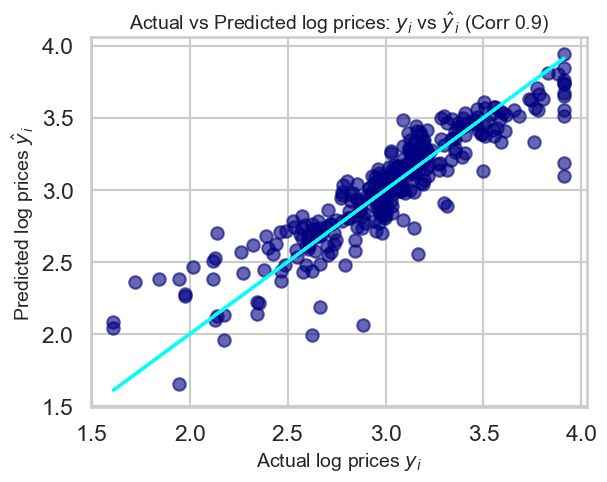

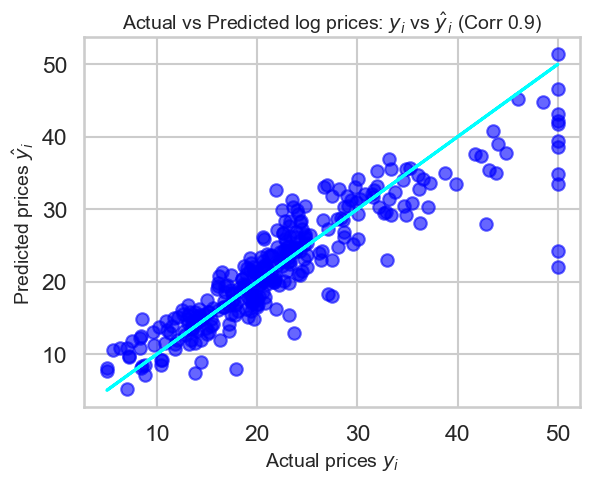

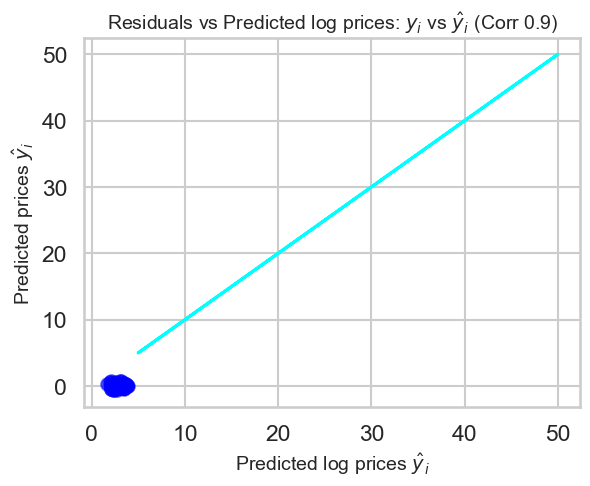

In [94]:

# Modified model:transformed ( using log prices) && simplified (dropping two features)
housing_data = housing_data[np.isfinite(housing_data).all(1)]
prices = np.log(housing_data['MEDV'])
features = housing_data.drop(['MEDV', 'INDUS', 'AGE'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(features, prices, test_size = 0.2, random_state = 10 )
#test data set is 20% of total

# Using Statsmodel
X_include_const = sm.add_constant(X_train)
model = sm.OLS(y_train, X_include_const)
# fitting our regression model
results = model.fit()


# Residuals
#residuals = y_train - results.fittedvalues
#residuals
#or
results.resid


# Graph of Actual vs. Predicted Prices
corr = round(y_train.corr(results.fittedvalues),2)
corr
plt.scatter(x=y_train, y=results.fittedvalues, c='navy', alpha=0.6)
plt.plot(y_train, y_train, color='cyan' )
plt.xlabel('Actual log prices $y _i$', fontsize= 14)
plt.ylabel('Predicted log prices $\hat y _i$', fontsize=14)
plt.title(f'Actual vs Predicted log prices: $y _i$ vs $\hat y_i$ (Corr {corr})', fontsize=14)
plt.show()

plt.scatter(x=np.e**y_train, y=np.e**results.fittedvalues, c='blue', alpha=0.6)
plt.plot(np.e**y_train, np.e**y_train, color='cyan' )
plt.xlabel('Actual prices $y _i$', fontsize= 14)
plt.ylabel('Predicted prices $\hat y _i$', fontsize=14)
plt.title(f'Actual vs Predicted log prices: $y _i$ vs $\hat y_i$ (Corr {corr})', fontsize=14)
plt.show()


# Residuals vs Predicted values
plt.scatter(x=results.fittedvalues, y=results.resid, c='blue', alpha=0.6)
plt.plot(np.e**y_train, np.e**y_train, color='cyan' )
plt.xlabel('Predicted log prices $\hat y _i$', fontsize= 14)
plt.ylabel('Predicted prices $\hat y _i$', fontsize=14)
plt.title(f'Residuals vs Predicted log prices: $y _i$ vs $\hat y_i$ (Corr {corr})', fontsize=14)
plt.show()
